In [95]:
import wbdata
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D


In [67]:
#Colection of data from World Bank
data_date = (datetime.datetime(2007, 1, 1), datetime.datetime(2024, 12, 31))

indicators = {'NY.GDP.MKTP.CD' : 'GDP_USD'}

data = wbdata.get_dataframe(indicators, country='KEN')

print(data.head())


           GDP_USD
date              
2024  1.244987e+11
2023  1.080386e+11
2022  1.144490e+11
2021  1.097037e+11
2020  1.006575e+11


In [68]:
#Setting the date to the required time and using the date format
start_date = datetime.datetime(2007, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

gdp_data = data.reset_index()

gdp_data['date'] = pd.to_datetime(gdp_data['date'], format='%Y', errors='coerce')
gdp_data = gdp_data.sort_values('date')

gdp_data = gdp_data[(gdp_data['date'] >= start_date) & (gdp_data['date'] <= end_date)]

print(gdp_data.head())

         date       GDP_USD
17 2007-01-01  3.195820e+10
16 2008-01-01  3.589515e+10
15 2009-01-01  4.234722e+10
14 2010-01-01  4.540562e+10
13 2011-01-01  4.686947e+10


In [69]:
#Drop any missing values
gdp_new_data = gdp_data.dropna()

print(gdp_new_data.head())

         date       GDP_USD
17 2007-01-01  3.195820e+10
16 2008-01-01  3.589515e+10
15 2009-01-01  4.234722e+10
14 2010-01-01  4.540562e+10
13 2011-01-01  4.686947e+10


In [70]:
#Using the exchangerate api to get value of a dollar in kes in realtime
url ="https://open.er-api.com/v6/latest/USD" 
response = requests.get(url)
data = response.json()

usd_to_kes = data["rates"]["KES"]
print(f"The exchange rate used is: {usd_to_kes}")


The exchange rate used is: 129.187636


In [71]:
#Converting the GDP column
gdp_new_data['GDP_KES'] = gdp_new_data['GDP_USD'] * usd_to_kes

print(gdp_new_data.head())

         date       GDP_USD       GDP_KES
17 2007-01-01  3.195820e+10  4.128604e+12
16 2008-01-01  3.589515e+10  4.637210e+12
15 2009-01-01  4.234722e+10  5.470737e+12
14 2010-01-01  4.540562e+10  5.865844e+12
13 2011-01-01  4.686947e+10  6.054956e+12


In [72]:
#Preaparing the data
gdp_new_data['Year'] = gdp_new_data['date'].dt.year
gdp_clean_new_data = gdp_new_data[['Year', 'GDP_KES']]

print(gdp_clean_new_data.head())

    Year       GDP_KES
17  2007  4.128604e+12
16  2008  4.637210e+12
15  2009  5.470737e+12
14  2010  5.865844e+12
13  2011  6.054956e+12


In [73]:
#Reading the data from csv file
cbk_data = pd.read_csv("C:\DATA ANALYTICS\PYDATA\PyData_Project\data\Mobile_Payments_2010-2024.csv")

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_24968\2677037917.py:2: SyntaxWarning: invalid escape sequence '\D'
  cbk_data = pd.read_csv("C:\DATA ANALYTICS\PYDATA\PyData_Project\data\Mobile_Payments_2010-2024.csv")


In [74]:
#Setting the data in the desired format
cbk_data['date'] = pd.to_datetime(cbk_data['Year'].astype(str) + '-' + cbk_data['Month'], format='%Y-%B')
cbk_new_data = cbk_data.sort_values('date')
print(cbk_new_data.head())

     Year  Month  Active Agents  Active Agents.1  \
219  2007  March            307         0.020992   
218  2007  April            362         0.054944   
217  2007    May            447         0.107733   
216  2007   June            527         0.175652   
215  2007   July            681         0.268499   

     Total Agent Cash in Cash Out (Volume Million)  \
219                                       0.021714   
218                                       0.070000   
217                                       0.150000   
216                                       0.233661   
215                                       0.354298   

     Total Agent Cash in Cash Out (Value KSh billions)       date  
219                                           0.064391 2007-03-01  
218                                           0.220896 2007-04-01  
217                                           0.483709 2007-05-01  
216                                           0.720102 2007-06-01  
215                   

In [75]:
#Setting the date as the index
Mobile_data = cbk_new_data.set_index('date')
print(Mobile_data.head())

            Year  Month  Active Agents  Active Agents.1  \
date                                                      
2007-03-01  2007  March            307         0.020992   
2007-04-01  2007  April            362         0.054944   
2007-05-01  2007    May            447         0.107733   
2007-06-01  2007   June            527         0.175652   
2007-07-01  2007   July            681         0.268499   

            Total Agent Cash in Cash Out (Volume Million)  \
date                                                        
2007-03-01                                       0.021714   
2007-04-01                                       0.070000   
2007-05-01                                       0.150000   
2007-06-01                                       0.233661   
2007-07-01                                       0.354298   

            Total Agent Cash in Cash Out (Value KSh billions)  
date                                                           
2007-03-01                    

In [76]:
#Aggregating the CBK mobile data by year(2007-2025)
cbk_yearly = Mobile_data.groupby('Year').agg({
    'Total Agent Cash in Cash Out (Value KSh billions)': 'sum',
    'Total Agent Cash in Cash Out (Volume Million)': 'sum',
    'Active Agents': 'mean'
}).reset_index()

print(cbk_yearly.head())


   Year  Total Agent Cash in Cash Out (Value KSh billions)  \
0  2007                                          16.318838   
1  2008                                         166.571320   
2  2009                                         473.411500   
3  2010                                         732.219900   
4  2011                                        1169.150200   

   Total Agent Cash in Cash Out (Volume Million)  Active Agents  
0                                       5.470349     826.000000  
1                                      62.740790    3520.666667  
2                                     193.500400   16570.000000  
3                                     311.046200   32270.333333  
4                                     432.998200   42115.083333  


In [77]:
#Merging the two datasets
merged_data = pd.merge(cbk_yearly, gdp_new_data, on='Year', how='inner')

print(merged_data.head())

   Year  Total Agent Cash in Cash Out (Value KSh billions)  \
0  2007                                          16.318838   
1  2008                                         166.571320   
2  2009                                         473.411500   
3  2010                                         732.219900   
4  2011                                        1169.150200   

   Total Agent Cash in Cash Out (Volume Million)  Active Agents       date  \
0                                       5.470349     826.000000 2007-01-01   
1                                      62.740790    3520.666667 2008-01-01   
2                                     193.500400   16570.000000 2009-01-01   
3                                     311.046200   32270.333333 2010-01-01   
4                                     432.998200   42115.083333 2011-01-01   

        GDP_USD       GDP_KES  
0  3.195820e+10  4.128604e+12  
1  3.589515e+10  4.637210e+12  
2  4.234722e+10  5.470737e+12  
3  4.540562e+10  5.865844e+12 

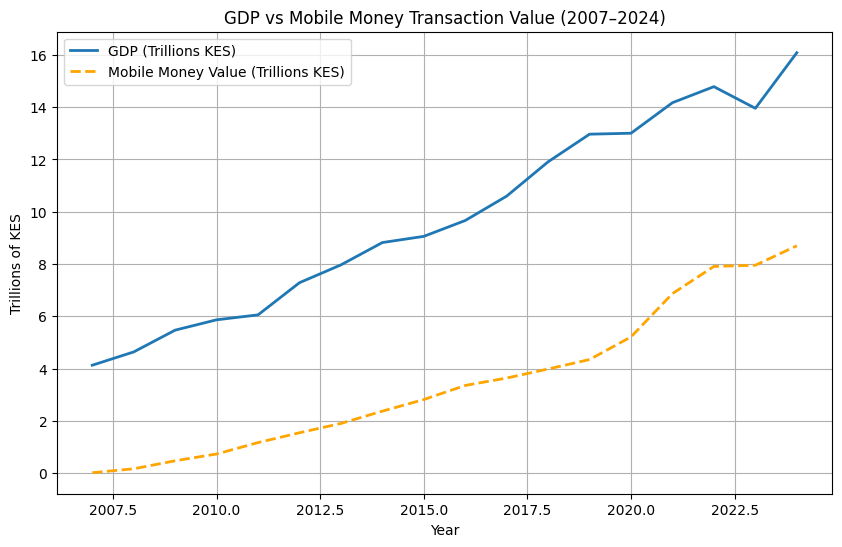

In [79]:
#Drawing the line plots to show trends over time
plt.figure(figsize=(10, 6))

plt.plot(merged_data['Year'], merged_data['GDP_KES']/1e12, label='GDP (Trillions KES)', linewidth=2)
plt.plot(merged_data['Year'], merged_data['Total Agent Cash in Cash Out (Value KSh billions)']/1000, 
         label='Mobile Money Value (Trillions KES)', linewidth=2, linestyle='--', color='orange')

plt.title('GDP vs Mobile Money Transaction Value (2007–2024)')
plt.xlabel('Year')
plt.ylabel('Trillions of KES')
plt.legend()
plt.grid(True)
plt.show()

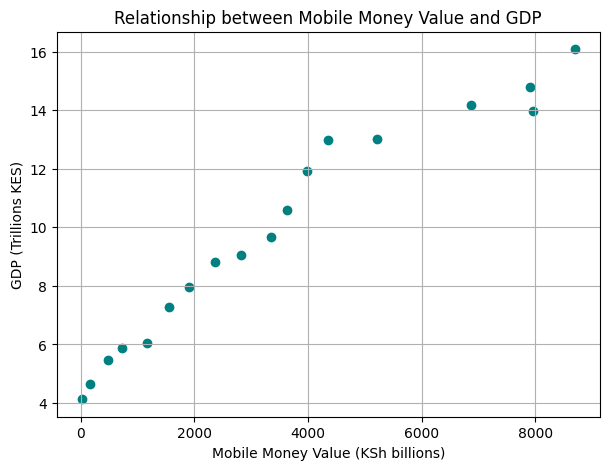

In [80]:
plt.figure(figsize=(7,5))
plt.scatter(merged_data['Total Agent Cash in Cash Out (Value KSh billions)'], merged_data['GDP_KES']/1e12, color='teal')
plt.title('Relationship between Mobile Money Value and GDP')
plt.xlabel('Mobile Money Value (KSh billions)')
plt.ylabel('GDP (Trillions KES)')
plt.grid(True)
plt.show()


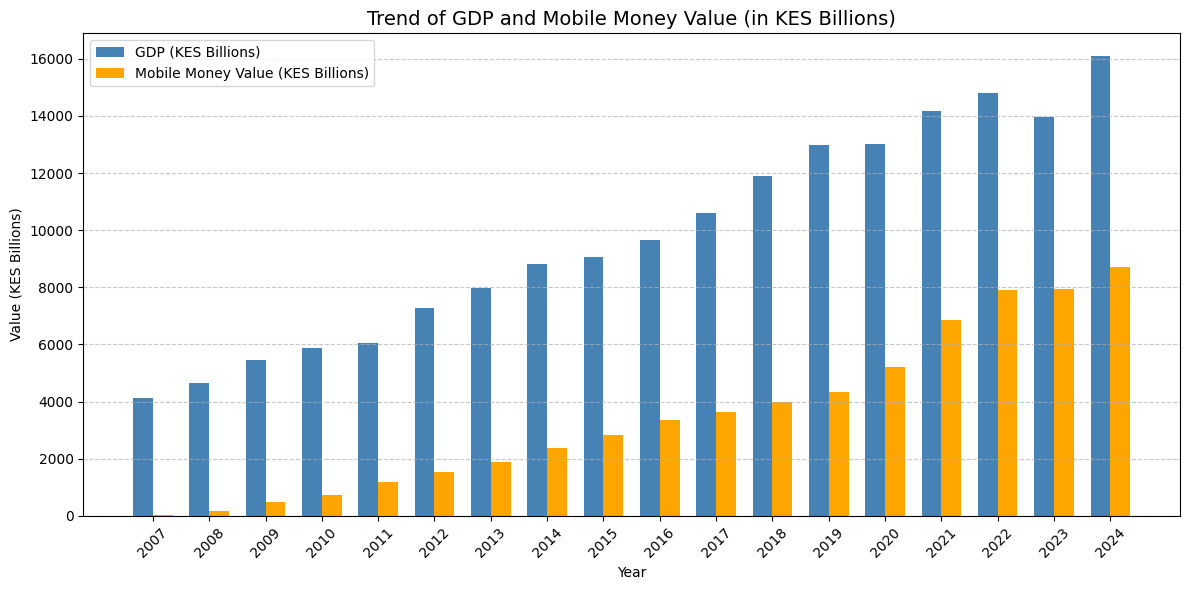

In [ ]:
#Line plots comparing the GDP and Mobile Money Value in Billions
merged_data['GDP_Billions'] = merged_data['GDP_KES'] / 1e9
merged_data['Mobile_Money_Billions'] = merged_data['Total Agent Cash in Cash Out (Value KSh billions)']

years = merged_data['Year']
x = np.arange(len(years))  
width = 0.35  


plt.figure(figsize=(12,6))
plt.bar(x - width/2, merged_data['GDP_Billions'], width, label='GDP (KES Billions)', color='steelblue')
plt.bar(x + width/2, merged_data['Mobile_Money_Billions'], width, label='Mobile Money Value (KES Billions)', color='orange')

plt.title('Trend of GDP and Mobile Money Value (in KES Billions)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Value (KES Billions)')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


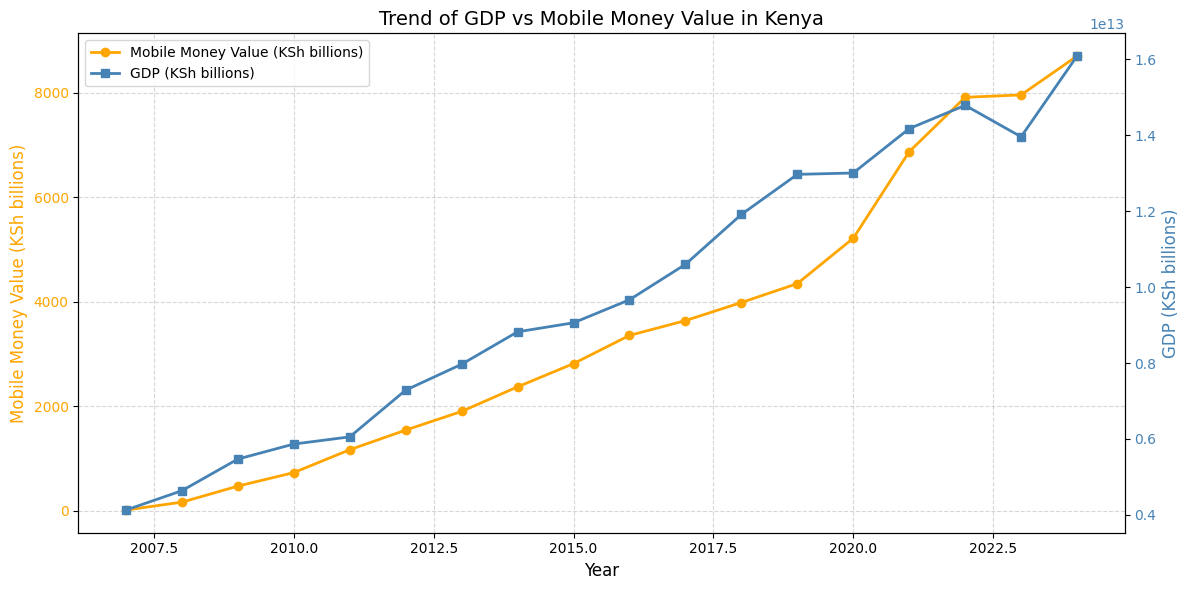

In [ ]:
#Dual line plot(GDP vs Mobile Money Value)

fig, ax1 = plt.subplots(figsize=(12,6))


ax1.plot(merged_data['Year'], 
         merged_data['Total Agent Cash in Cash Out (Value KSh billions)'], 
         color='orange', 
         marker='o', 
         linewidth=2, 
         label='Mobile Money Value (KSh billions)')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Mobile Money Value (KSh billions)', color='orange', fontsize=12)
ax1.tick_params(axis='y', labelcolor='orange')


ax2 = ax1.twinx()
ax2.plot(merged_data['Year'], 
         merged_data['GDP_KES'], 
         color='steelblue', 
         marker='s', 
         linewidth=2, 
         label='GDP (KSh billions)')
ax2.set_ylabel('GDP (KSh billions)', color='steelblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='steelblue')


plt.title('Trend of GDP vs Mobile Money Value in Kenya', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.5)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
#Regression Analysis
#The purpose of regression analysis id to test whether mobile money transactions can explain or predict the changes in Kenya's GDP.
X = merged_data['Total Agent Cash in Cash Out (Value KSh billions)']
y = merged_data['GDP_KES']

# Add constant term for intercept
# GDP = a + b*(Mobile money)
X = sm.add_constant(X)

# Fit regression model
#This model is known as the ordinary least squares regression.
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                GDP_KES   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     256.5
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           2.85e-11
Time:                        20:40:10   Log-Likelihood:                -520.86
No. Observations:                  18   AIC:                             1046.
Df Residuals:                      16   BIC:                             1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

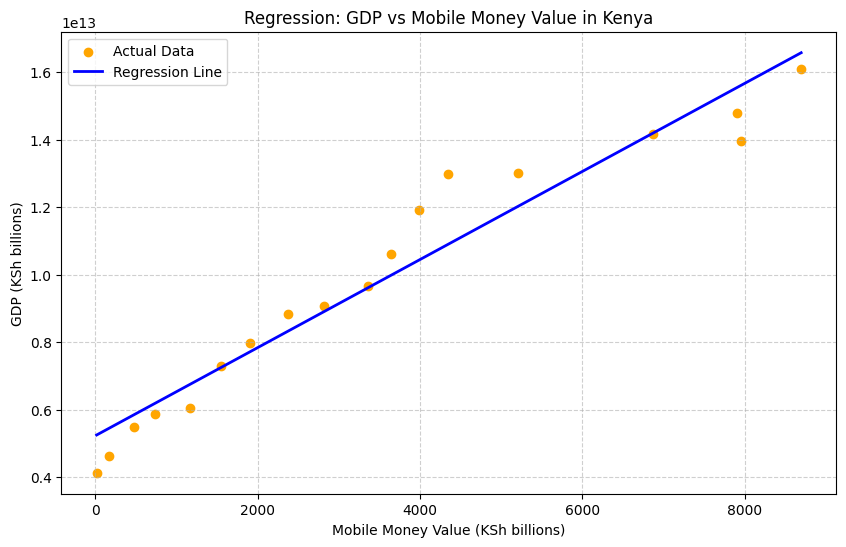

In [ ]:
#Visualizing the Regression Line
#A regression line is a straight line that best fits the data points in a scatter plot, showing the relationship between two variables.

plt.figure(figsize=(10,6))
plt.scatter(merged_data['Total Agent Cash in Cash Out (Value KSh billions)'], merged_data['GDP_KES'], 
            color='orange', label='Actual Data')
plt.plot(merged_data['Total Agent Cash in Cash Out (Value KSh billions)'], 
         model.predict(X), color='blue', linewidth=2, label='Regression Line')

plt.xlabel('Mobile Money Value (KSh billions)')
plt.ylabel('GDP (KSh billions)')
plt.title('Regression: GDP vs Mobile Money Value in Kenya')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [99]:
print(merged_data.columns.tolist())

['Year', 'Total Agent Cash in Cash Out (Value KSh billions)', 'Total Agent Cash in Cash Out (Volume Million)', 'Active Agents', 'date', 'GDP_USD', 'GDP_KES', 'GDP_Billions', 'Mobile_Money_Billions', 'GDP_Growth_%', 'Mobile_Money_Growth_%']
